This jupyter notebook is based on the materials of [CPSC 662 / AMTH 561: Spectral Graph Theory](http://www.cs.yale.edu/homes/spielman/561/561schedule.html). The original code was in Julia and we convert them into Python. The code has been re-organized for the reading group on spectral graph theory at AWS Shanghai AI Lab. 

Some sections have not been covered directly in the reading group and I mark the titles of them with an $\ast$.

Below we show how the eigenvalues and eigenvectors of many special graphs can be meaningful.

# 2.1 Laplacian Matrices 

You may need to install additional dependencies with pip or conda.

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

from mayavi import mlab
from scipy import linalg as LA

## Paths

In [2]:
# Initialize a path graph and compute its adjacency matrix.
M = nx.path_graph(4)
print(nx.adjacency_matrix(M).todense())

[[0 1 0 0]
 [1 0 1 0]
 [0 1 0 1]
 [0 0 1 0]]


In [3]:
# Compute the Laplacian matrix of the graph.
print(nx.laplacian_matrix(M).todense())

[[ 1 -1  0  0]
 [-1  2 -1  0]
 [ 0 -1  2 -1]
 [ 0  0 -1  1]]


In [4]:
# Initialize a larger path graph and compute the eigenvalues/eigenvectors of its Laplacian matrix.
L = nx.laplacian_matrix(nx.path_graph(10)).todense()
eigenval, eigenvec = LA.eigh(L)

# Note that the eigenvalues are ordered from smallest to largest.
print(eigenval)

[0.         0.09788697 0.38196601 0.8244295  1.38196601 2.
 2.61803399 3.1755705  3.61803399 3.90211303]


In [5]:
# The eigenvector corresponding to zero is a constant vector.
v0 = eigenvec[:, 0]
print(v0)

# Note that the returned eigenvectors are normalized so that its L2 norm is 1.
print((v0 ** 2).sum())

[0.31622777 0.31622777 0.31622777 0.31622777 0.31622777 0.31622777
 0.31622777 0.31622777 0.31622777 0.31622777]
0.9999999999999999


In [6]:
# The eigenvector corresponding to the second smallest eigenvalue increases monotonically along the path.
v1 = eigenvec[:, 1]
print(v1)

[-0.44170765 -0.39847023 -0.31622777 -0.20303072 -0.06995962  0.06995962
  0.20303072  0.31622777  0.39847023  0.44170765]


Text(0, 0.5, 'eigenvec value')

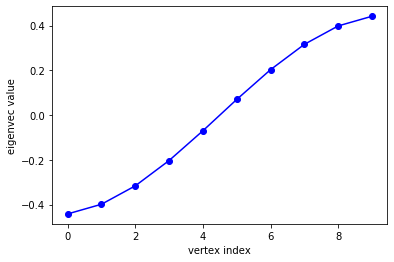

In [7]:
# Visualize the eigenvector.
plt.plot(v1, 'bo-')
plt.xlabel('vertex index')
plt.ylabel('eigenvec value')

Text(0, 0.5, 'eigenvec value')

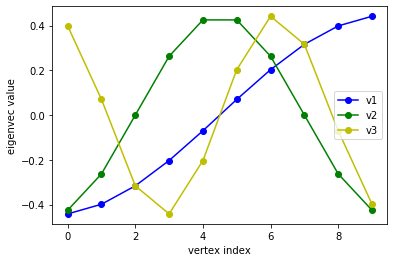

In [8]:
# Visualize the next few eigenvector
plt.plot(eigenvec[:, 1], 'bo-', label='v1')
plt.plot(eigenvec[:, 2], 'go-', label='v2')
plt.plot(eigenvec[:, 3], 'yo-', label='v3')
plt.legend(loc='right')
plt.xlabel('vertex index')
plt.ylabel('eigenvec value')

The plots of the eigenvectors resemble the modes of vibration of a string. This is because the path grpah can be viewed as a discretizattion of the string and its Laplacian matrix is a discretization of the Laplacian operator. As the eigenvalue increases, the fluctuation of its corresponding eigenvector also increases. This is why the eigenvectors corresponding to small eigenvalues are called *low-frequency* and the ones corresponding to large eigenvalues are called *high-frequency*.

Text(0, 0.5, 'eigenvec value')

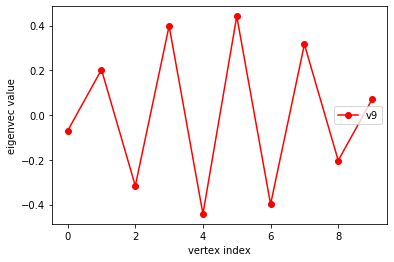

In [9]:
# The most extreme case.
plt.plot(eigenvec[:, -1], 'ro-', label='v9')
plt.legend(loc='right')
plt.xlabel('vertex index')
plt.ylabel('eigenvec value')

The highest frequency eigenvector alternates positive and negative with every vertex. This should hint you about why these may be related to problems like graph coloring or finding independent sets.

## Spectral Graph Drawing*

The low-frequency eigenvalues can give rise to a nice drawing of a graph.

/Users/mufei/miniconda3/envs/dgl-chem/lib/python3.6/site-packages/networkx-2.3-py3.6.egg/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


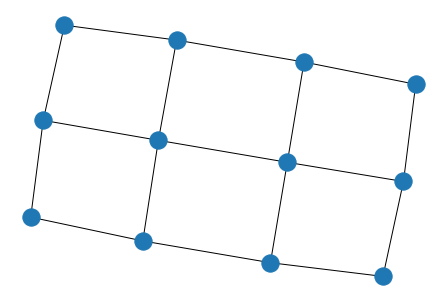

In [10]:
# Initialize a 3-by-4 2D grid graph.
M = nx.grid_2d_graph(3, 4)
nx.draw(M)

/Users/mufei/miniconda3/envs/dgl-chem/lib/python3.6/site-packages/networkx-2.3-py3.6.egg/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


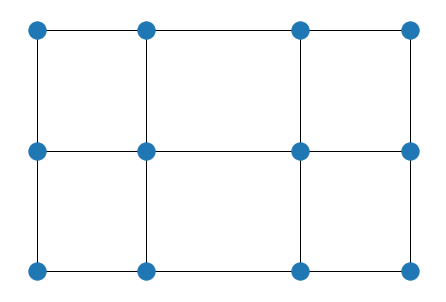

In [11]:
def Laplacian_coordinates_2d_grid(G, num_cols):
    # Get the eigenvectors corresponding to the second and third smallest eigenvalues.
    L = nx.laplacian_matrix(G).todense()
    eigenval, eigenvec = LA.eigh(L)
    v12 = eigenvec[:, 1:3]

    # Use these eigenvectors as coordinates of the graph.
    pos = dict()
    for i in range(M.number_of_nodes()):
        row = i // num_cols
        col = i % num_cols
        pos[(row ,col)] = v12[i]
    return pos

nx.draw(M, pos=Laplacian_coordinates_2d_grid(M, 4))

## Graph Isomorphism*

/Users/mufei/miniconda3/envs/dgl-chem/lib/python3.6/site-packages/networkx-2.3-py3.6.egg/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


[ 6 11  4 10  2  8  1  7  9  3  0  5]


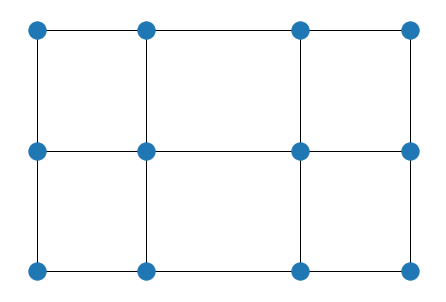

In [12]:
# Randomly permute the vertices.
np.random.seed(0)
p = np.random.permutation(M.number_of_nodes())
print(p)
M_p = nx.relabel_nodes(M, {i:p[i] for i in range(M.number_of_nodes())})

# Draw the permutated graph with Laplacian eigenvectors
nx.draw(M_p, pos=Laplacian_coordinates_2d_grid(M_p, 4))

Drawing graphs based on the eigenvectors of graph Laplacian gives us a very powerful heuristi for testing if one graph is a permutation of another. We can proceed as follows:
1. Check if the two graphs have the same set of eigenvalues. If they don't, they are not isomorphic.
2. If they do, and the eigenvalues have multiplicitly one, then draw the pictures above. Since the eigenvectors are only determined up to signs, if the pictures are the same, up to horizontal or vertical flips, and no vertex is mapped to the same location as another, then by lining up the pictures we can recover the permutation.

These algorithms have been extended to handle graph in which the multiplicity of every eigenvalue is bounded by a constant. But there are graphs in which every non-trivial eigenvalue has large multiplicity. We will learn how to construct and analyze these, as they constitute fundamental examples and counter-examples to many natural conjectures.

## Platonic Solids*

Some graphs are not meant to be drawn in $3$ dimensions. For example, let's try this with the dodecahedral graph.

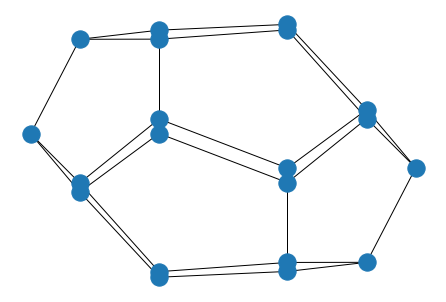

In [13]:
M = nx.dodecahedral_graph()
nx.draw_spectral(M)

The picture looks like what you would get if you squashed the dodecahedral graph down to the plane. The reason is that we really shouldn't be drawing this picture in two dimensions: the smallest non-zero eigenvalue of the Laplacian has multiplicity three.

In [14]:
L = nx.laplacian_matrix(M).todense()
eigenval, eigenvec = LA.eigh(L)
print(eigenval)

[4.44089210e-15 7.63932023e-01 7.63932023e-01 7.63932023e-01
 2.00000000e+00 2.00000000e+00 2.00000000e+00 2.00000000e+00
 2.00000000e+00 3.00000000e+00 3.00000000e+00 3.00000000e+00
 3.00000000e+00 5.00000000e+00 5.00000000e+00 5.00000000e+00
 5.00000000e+00 5.23606798e+00 5.23606798e+00 5.23606798e+00]


Rather than using two eigenvectors, we should use three that span the eigenspace.

In [15]:
mlab.init_notebook()

eigenval, eigenvec = LA.eigh(L)
v123 = eigenvec[:, 1:4]

mlab.figure(1, bgcolor=(0, 0, 0))
mlab.clf()
pts = mlab.points3d(v123[:, 0], v123[:, 1], v123[:, 2],
                    np.array(list(M.nodes())),
                    scale_factor=0.1,
                    scale_mode='none',
                    colormap='Blues')

pts.mlab_source.dataset.lines = np.array(list(M.edges()))
tube = mlab.pipeline.tube(pts, tube_radius=0.01)
mlab.pipeline.surface(tube, color=(0.8, 0.8, 0.8))

Notebook initialized with ipy backend.


Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01^\x08\x02\x00\x00\x00$?\xde_\x00\…

Such a phenomenon exists for all Platonic solids. In fact, if we properly re-weight the edges, it happens for every graph that is the one-skeleton of a convex polytope. 

You might find the plot below with the final three eigenvectors interesting.

In [16]:
mlab.init_notebook()

eigenval, eigenvec = LA.eigh(L)
v123 = eigenvec[:, -3:]

mlab.figure(2, bgcolor=(0, 0, 0))
mlab.clf()
pts = mlab.points3d(v123[:, 0], v123[:, 1], v123[:, 2],
                    np.array(list(M.nodes())),
                    scale_factor=0.1,
                    scale_mode='none',
                    colormap='Blues')

pts.mlab_source.dataset.lines = np.array(list(M.edges()))
tube = mlab.pipeline.tube(pts, tube_radius=0.01)
mlab.pipeline.surface(tube, color=(0.8, 0.8, 0.8))

Notebook initialized with ipy backend.


Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01^\x08\x02\x00\x00\x00$?\xde_\x00\…